In [114]:
#pip install citipy

In [115]:
from citipy import citipy
from random import uniform
import requests, json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [116]:
city = citipy.nearest_city(22.99, 120.21)


#city.city_name     # Tainan, my home town
#'tainan'

#city.country_code
#'tw'                  # And the country is surely Taiwan

In [117]:
cities = []
lats = []
for i in range(20):
    lat_coord  = round(uniform(-180,180), 2)
    long_coord = round(uniform(-90, 90), 2)
    city = citipy.nearest_city(lat_coord, long_coord).city_name
    cities.append(city)
    lats.append(lat_coord)
    print(f"{city}, located at ({lat_coord}, {long_coord})")
print (cities, lats)

ushuaia, located at (-159.92, -77.32)
ushuaia, located at (-156.5, -45.19)
bushehr, located at (28.33, 50.33)
podgorenskiy, located at (50.57, 39.42)
longyearbyen, located at (162.28, 25.68)
busselton, located at (-63.04, 78.97)
cankuzo, located at (-3.21, 30.47)
biarritz, located at (44.02, -1.89)
kruisfontein, located at (-104.2, 31.34)
kumher, located at (27.28, 77.31)
port elizabeth, located at (-139.54, 43.18)
port elizabeth, located at (-127.22, 40.84)
dikson, located at (86.82, 78.33)
illoqqortoormiut, located at (101.19, -13.98)
caravelas, located at (-22.17, -23.15)
cape town, located at (-71.1, -11.49)
bredasdorp, located at (-39.77, 19.93)
barentsburg, located at (153.72, -19.29)
ushuaia, located at (-80.18, -27.11)
victoria, located at (-8.08, 64.84)
['ushuaia', 'ushuaia', 'bushehr', 'podgorenskiy', 'longyearbyen', 'busselton', 'cankuzo', 'biarritz', 'kruisfontein', 'kumher', 'port elizabeth', 'port elizabeth', 'dikson', 'illoqqortoormiut', 'caravelas', 'cape town', 'bredas

In [137]:
url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = 'dd74909c8156c984d600e5782436601a'
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# set up lists to hold reponse info
temps = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        temp = response['main']['temp']
    except KeyError:
        temp = np.nan
    temps.append(temp)
    print (f"{city} temperature is {temp}")


ushuaia temperature is 11
ushuaia temperature is 11
bushehr temperature is 28
podgorenskiy temperature is 10.4
longyearbyen temperature is -5
busselton temperature is 12.71
cankuzo temperature is 16.24
biarritz temperature is 15.69
kruisfontein temperature is 20
kumher temperature is 27.5
port elizabeth temperature is 21
port elizabeth temperature is 21
dikson temperature is -0.95
illoqqortoormiut temperature is nan
caravelas temperature is 28.57
cape town temperature is 19.74
bredasdorp temperature is 18
barentsburg temperature is nan
ushuaia temperature is 11
victoria temperature is 22.85


In [138]:
lat_vs_temp_df = pd.DataFrame({"City" : cities,
                             "Latitude": list(map(abs, lats)),
                               "Temperature" : temps
                              })
lat_vs_temp_df


,City,Latitude,Temperature
0,ushuaia,159.92,11.00
1,ushuaia,156.50,11.00
2,bushehr,28.33,28.00
3,podgorenskiy,50.57,10.40
4,longyearbyen,162.28,-5.00
5,busselton,63.04,12.71
6,cankuzo,3.21,16.24
7,biarritz,44.02,15.69
8,kruisfontein,104.20,20.00
9,kumher,27.28,27.50


In [143]:
clean_lat_vs_temp_df = lat_vs_temp_df.dropna(how='any', axis=0)

clean_lat_vs_temp_df= clean_lat_vs_temp_df.drop_duplicates(subset ="City",
                     keep = 'first').reset_index(drop=True)

#clean_lat_vs_temp_df = clean_lat_vs_temp_df

clean_lat_vs_temp_df

,City,Latitude,Temperature
0,ushuaia,159.92,11.00
1,bushehr,28.33,28.00
2,podgorenskiy,50.57,10.40
3,longyearbyen,162.28,-5.00
4,busselton,63.04,12.71
5,cankuzo,3.21,16.24
6,biarritz,44.02,15.69
7,kruisfontein,104.20,20.00
8,kumher,27.28,27.50
9,port elizabeth,139.54,21.00


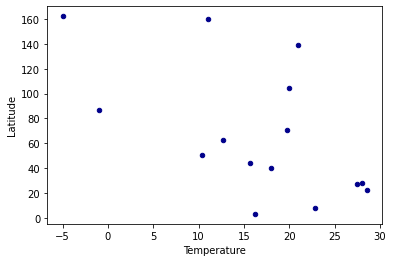

In [144]:
ax1 = clean_lat_vs_temp_df.plot.scatter(x='Temperature', y='Latitude', c='DarkBlue')
plt.show()


#plt.scatter(clean_lat_vs_temp_df["temps, lats, marker="o", facecolors="red", edgecolors="black", s=temps, alpha=1)